<a href="https://colab.research.google.com/github/FaustoJuarez/Machine-Learning-Journey/blob/main/RGBtoSeparatedBands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculating for our Area of Interest


In [2]:
!pip install rawpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.3 MB/s eta 0:00:00


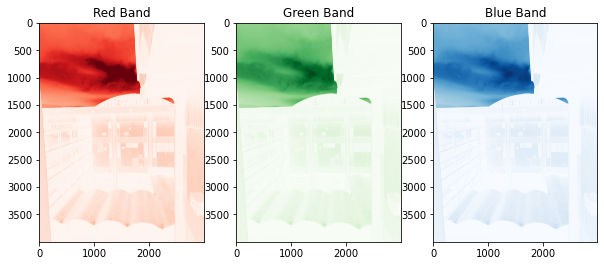

In [12]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt

# Load the .dng image
with rawpy.imread("/content/quintaagro16-2-23.dng") as raw:
    # Get the raw RGB data
    rgb = raw.postprocess()

# Split the RGB data into separate bands
r = rgb[:, :, 0]
g = rgb[:, :, 1]
b = rgb[:, :, 2]

# Display the RGB bands using matplotlib
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.imshow(r, cmap='Reds')
ax1.set_title('Red Band')
ax2.imshow(g, cmap='Greens')
ax2.set_title('Green Band')
ax3.imshow(b, cmap='Blues')
ax3.set_title('Blue Band')
plt.show()


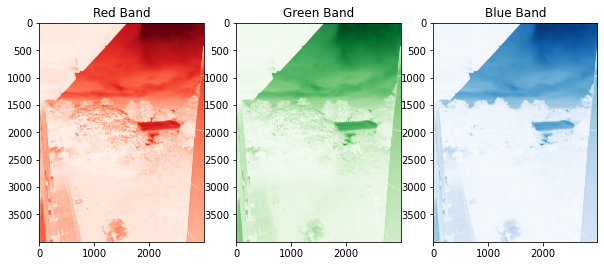

In [13]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt

# Load the .dng image
with rawpy.imread("/content/quintaagro16-2-23-2.dng") as raw:
    # Get the raw RGB data
    rgb = raw.postprocess()

# Split the RGB data into separate bands
r = rgb[:, :, 0]
g = rgb[:, :, 1]
b = rgb[:, :, 2]

# Display the RGB bands using matplotlib
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.imshow(r, cmap='Reds')
ax1.set_title('Red Band')
ax2.imshow(g, cmap='Greens')
ax2.set_title('Green Band')
ax3.imshow(b, cmap='Blues')
ax3.set_title('Blue Band')
plt.show()


In [16]:
import rawpy
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [47]:
with rawpy.imread('/content/quintaagro16-2-23.dng') as raw:
    rgb = raw.postprocess()


In [48]:
r, g, b = cv2.split(rgb)


In [49]:
gli = (2 * g - r - b) / (2 * g + r + b + 0.01)
gli[np.isnan(gli) | np.isinf(gli)] = 0
gli_normalized = (gli - np.min(gli)) / (np.max(gli) - np.min(gli))


In [50]:
with rawpy.imread('/content/quintaagro16-2-23.dng') as raw:
    rgb = raw.postprocess()
r, g, b = cv2.split(rgb)

# Calculate the GLI index
denominator = (2 * g + r + b + 0.01)
gli = np.zeros_like(g)
valid_mask = denominator > 0
gli[valid_mask] = (2 * g[valid_mask] - r[valid_mask] - b[valid_mask]) / denominator[valid_mask]

# Print some debugging information
print("r:", r)
print("g:", g)
print("b:", b)
print("denominator:", denominator)
print("gli:", gli)
print("gli_normalized:", gli_normalized)

r: [[120 119 118 ...   5   4   4]
 [121 118 119 ...   5   3   3]
 [120 119 118 ...   0   0   0]
 ...
 [ 31  22  41 ...  18  24  24]
 [ 44  26  19 ...  17  26  26]
 [ 34  38  28 ...  21  40  40]]
g: [[98 98 97 ...  3  1  1]
 [99 98 98 ...  3  3  3]
 [99 98 98 ...  0  0  0]
 ...
 [17 14 15 ... 13 17 17]
 [17 13 11 ... 11 17 17]
 [16 18 13 ... 12 19 19]]
b: [[92 91 90 ...  0  2  2]
 [92 91 91 ...  0  1  1]
 [92 91 91 ...  0  0  0]
 ...
 [12 10 12 ...  7 12 12]
 [12  8  8 ...  7 10 10]
 [ 9 11 10 ...  9 15 15]]
denominator: [[1.5201e+02 1.5001e+02 1.4601e+02 ... 1.1010e+01 8.0100e+00 8.0100e+00]
 [1.5501e+02 1.4901e+02 1.5001e+02 ... 1.1010e+01 1.0010e+01 1.0010e+01]
 [1.5401e+02 1.5001e+02 1.4901e+02 ... 1.0000e-02 1.0000e-02 1.0000e-02]
 ...
 [7.7010e+01 6.0010e+01 8.3010e+01 ... 5.1010e+01 7.0010e+01 7.0010e+01]
 [9.0010e+01 6.0010e+01 4.9010e+01 ... 4.6010e+01 7.0010e+01 7.0010e+01]
 [7.5010e+01 8.5010e+01 6.4010e+01 ... 5.4010e+01 9.3010e+01 9.3010e+01]]
gli: [[ 1  1  1 ...  0 31 31]


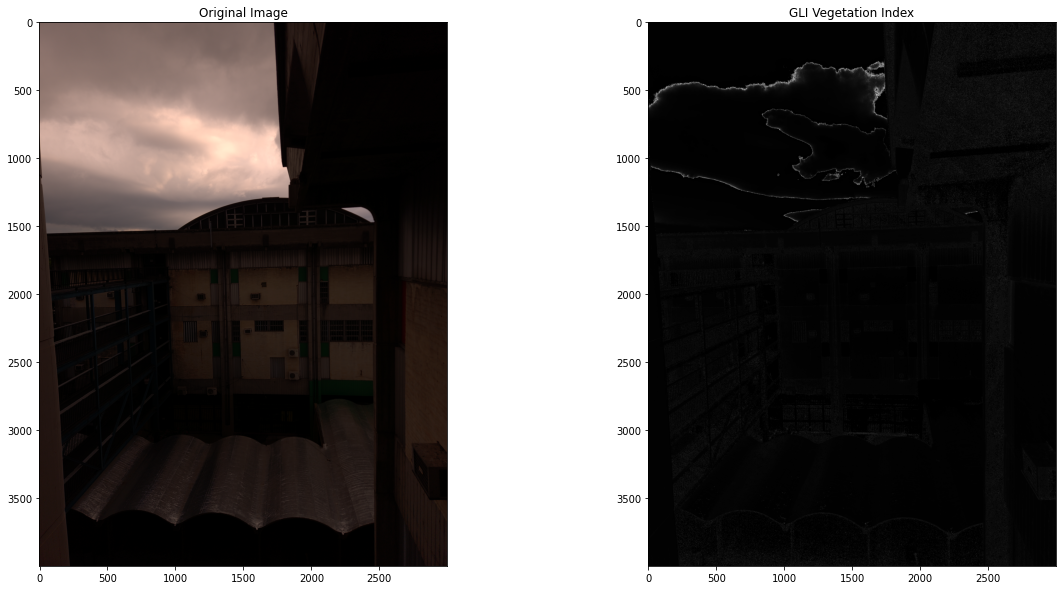

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(rgb)
ax[0].set_title('Original Image')
ax[1].imshow(gli, cmap='gray')
ax[1].set_title('GLI Vegetation Index')
plt.show()


In [52]:
print(gli_normalized)

[[6.26525197e-05 6.40168962e-05 6.57706637e-05 ... 3.60422704e-06
  1.24843945e-03 1.24843945e-03]
 [6.16959684e-05 6.47128189e-05 6.40168962e-05 ... 3.60422704e-06
  7.92857936e-06 7.92857936e-06]
 [6.23542277e-05 6.40168962e-05 6.47128189e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.27276812e-04 1.66638894e-04 1.11384553e-04 ... 7.77936477e-07
  1.43970363e-04 1.43970363e-04]
 [1.03163141e-04 1.63993832e-04 2.03230309e-04 ... 2.19069008e-04
  1.43970363e-04 1.43970363e-04]
 [1.29612348e-04 1.13432033e-04 1.51266047e-04 ... 1.83681446e-04
  1.01968896e-04 1.01968896e-04]]


In [53]:
ax[1].imshow(gli_normalized, cmap='gray')
plt.draw()
plt.pause(0.001)


<Figure size 432x288 with 0 Axes>

Calculo VI Green

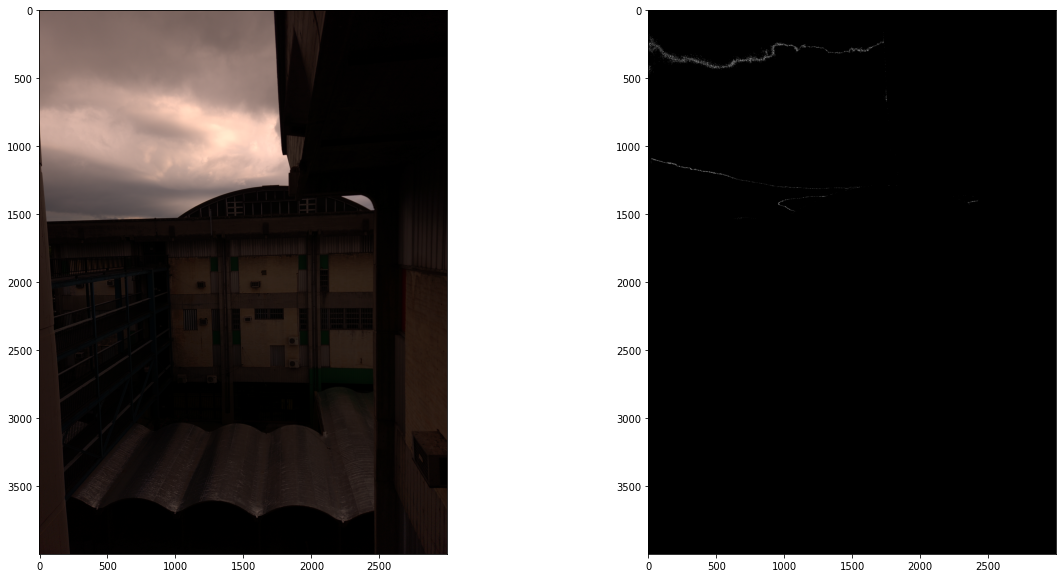

In [54]:
# Calculate the VIG
vig = (g - r) / (g + r + 0.01)

# Normalize the VIG to [0, 1] for display
vig_normalized = (vig - np.min(vig)) / (np.max(vig) - np.min(vig))

# Display the RGB image and the VIG
fig, ax = plt.subplots(1, 2,figsize=(20, 10))
ax[0].imshow(rgb)
ax[1].imshow(vig_normalized, cmap='gray')
plt.show()

Calculo MPRI

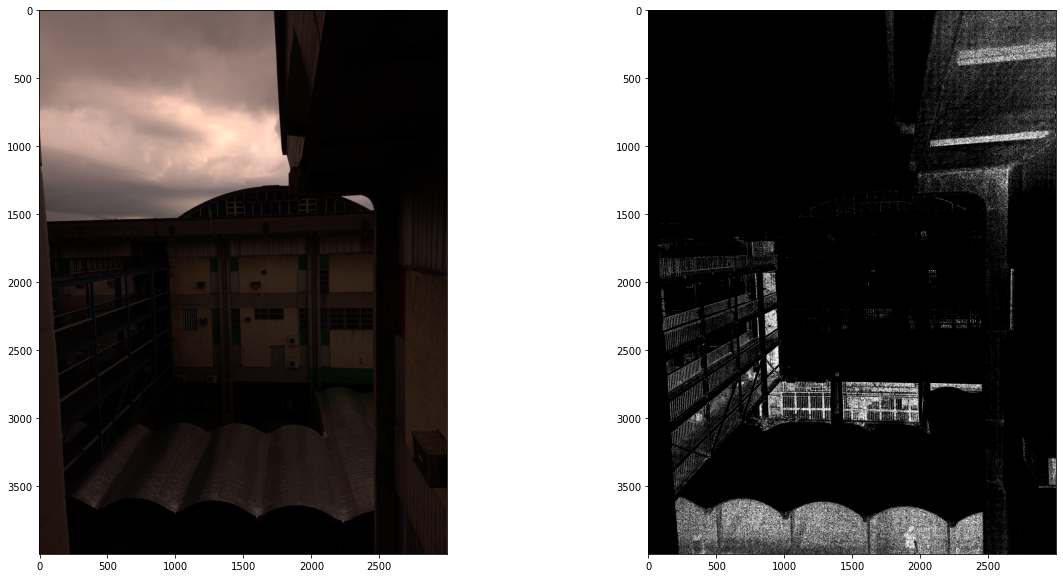

In [55]:
# Calculate the MPRI
Fm = np.max(g)
F = g.mean()
mpri = (Fm - g) / (g + 0.01)


# Normalize the MPRI to [0, 1] for display
mpri_normalized = (mpri - np.min(mpri)) / (np.max(mpri) - np.min(mpri))

# Display the RGB image and the MPRI
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(rgb)
ax[1].imshow(mpri_normalized, cmap='gray')
plt.show()

Calculating MGRVI


In [56]:
red_band = rgb[:, :, 0]
green_band = rgb[:, :, 1]


In [57]:
mgrvi = (green_band - red_band) / (green_band + red_band + 0.01)


In [58]:
mgrvi_normalized = (mgrvi - mgrvi.min()) / (mgrvi.max() - mgrvi.min() + 0.01)


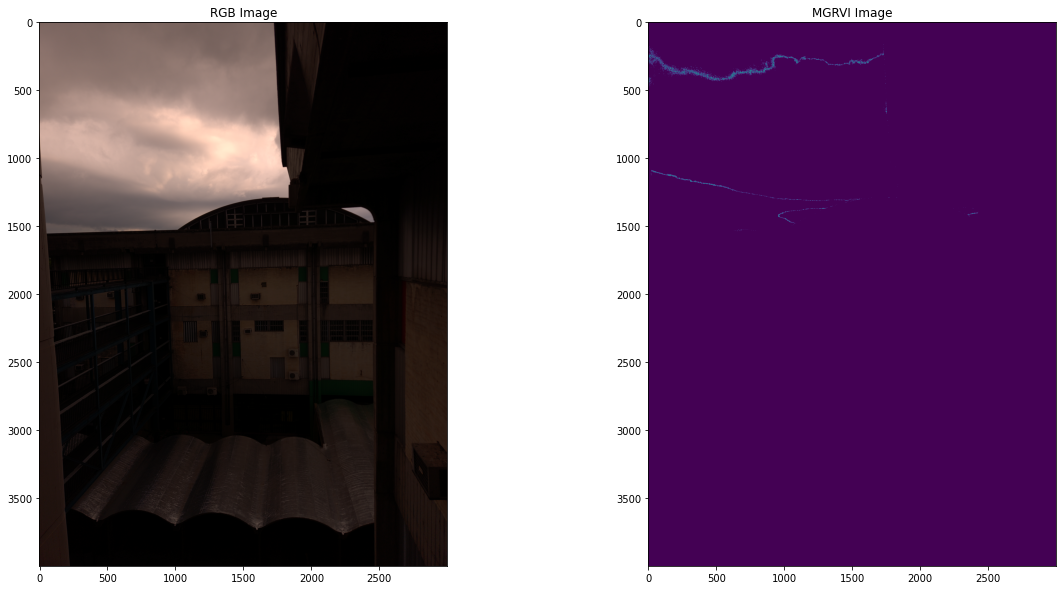

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(rgb)
ax[0].set_title('RGB Image')
ax[1].imshow(mgrvi_normalized, cmap='viridis')
ax[1].set_title('MGRVI Image')
plt.show()
